# Credit Card Fraud Detection

## Libraries

In [1]:
!pip install sweetviz

In [2]:
!pip install missingno

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import sweetviz as sv
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load information

In [5]:
credit = pd.read_csv("C:/Users/Usuario/Desktop/PYTHON DATUX PERÚ/application_data.csv")

In [6]:
credit.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# E.D.A

In [7]:
credit.duplicated().sum()

0

In [8]:
credit.shape

(307511, 122)

In [9]:
credit.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

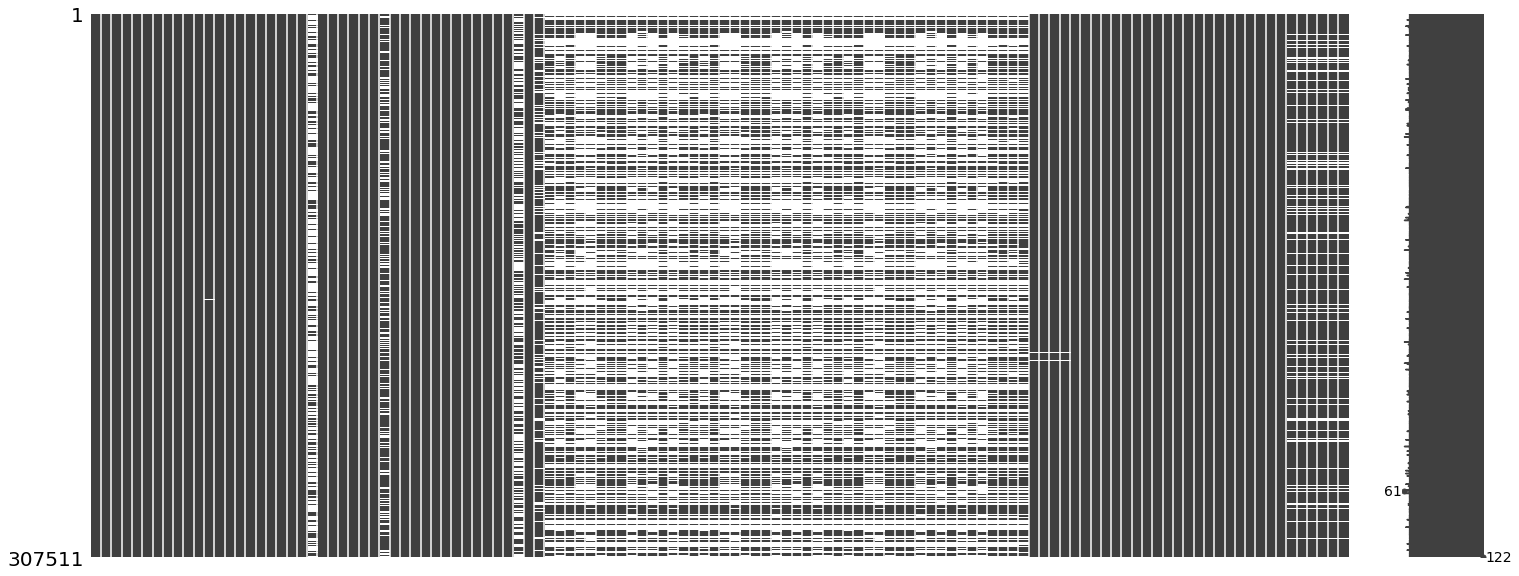

In [10]:
mno.matrix(credit)
plt.show()

In [11]:
credit.isnull().mean()

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [12]:
#my_report = sv.analyze(credit)
#my_report.show_html('dataset_1.html')

In [13]:
percentiles = [i/100 for i in range(0, 11, 2)] + [i/100 for i in range(91, 100, 2)]
credit.describe(percentiles=percentiles).round(3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,3.075110e+05,307511.000,307499.000,307233.000,307511.000,307511.000,307511.000,307511.000,307511.000,104582.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307509.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,134133.000,306851.000,246546.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,159080.000,306490.000,306490.000,306490.000,306490.000,307510.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,278180.519,0.081,0.417,1.687979e+05,599026.000,27108.574,538396.207,0.021,-16036.995,63815.046,-4986.120,-2994.202,12.061,1.000,0.820,0.199,0.998,0.281,0.057,2.153,2.052,2.032,12.063,0.015,0.051,0.041,0.078,0.230,0.180,0.502,0.514,0.511,0.117,0.088,0.978,0.752,0.045,0.079,0.150,0.226,0.232,0.066,0.101,0.107,0.009,0.028,0.114,0.088,0.977,0.760,0.043,0.074,0.145,0.222,0.228,0.065,0.106,0.106,0.008,0.027,0.118,0.088,0.978,0.756,0.045,0.078,0.149,0.226,0.232,0.067,0.102,0.109,0.009,0.028,0.103,1.422,0.143,1.405,0.100,-962.859,0.000,0.710,0.000,0.015,0.088,0.000,0.081,0.004,0.000,0.004,0.000,0.004,0.003,0.001,0.010,0.000,0.008,0.001,0.001,0.000,0.006,0.007,0.034,0.267,0.265,1.900
std,102790.175,0.272,0.722,2.371231e+05,402490.777,14493.737,369446.461,0.014,4363.989,141275.767,3522.886,1509.450,11.945,0.002,0.384,0.400,0.043,0.450,0.231,0.911,0.509,0.503,3.266,0.122,0.220,0.197,0.268,0.421,0.384,0.211,0.191,

# Data Cleaning

In [14]:
datacredit = credit.drop("SK_ID_CURR",axis=1)

In [15]:
def drop_null_columns(df):
    # Calcular el porcentaje de valores nulos por columna
    null_percentages = df.isnull().sum() / len(df)

    # Seleccionar las columnas con porcentaje de nulos menor o igual al 33%
    selected_columns = null_percentages[null_percentages <= 0.33].index

    # Eliminar las columnas no seleccionadas del dataframe
    result = df[selected_columns]

    return result

In [16]:
credit = drop_null_columns(credit)

In [17]:
credit.shape

(307511, 73)

In [18]:
credit.isnull().mean().sort_values(ascending=False)

OCCUPATION_TYPE                0.313455
EXT_SOURCE_3                   0.198253
AMT_REQ_CREDIT_BUREAU_YEAR     0.135016
AMT_REQ_CREDIT_BUREAU_QRT      0.135016
AMT_REQ_CREDIT_BUREAU_MON      0.135016
AMT_REQ_CREDIT_BUREAU_WEEK     0.135016
AMT_REQ_CREDIT_BUREAU_DAY      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR     0.135016
NAME_TYPE_SUITE                0.004201
OBS_30_CNT_SOCIAL_CIRCLE       0.003320
DEF_30_CNT_SOCIAL_CIRCLE       0.003320
OBS_60_CNT_SOCIAL_CIRCLE       0.003320
DEF_60_CNT_SOCIAL_CIRCLE       0.003320
EXT_SOURCE_2                   0.002146
AMT_GOODS_PRICE                0.000904
AMT_ANNUITY                    0.000039
CNT_FAM_MEMBERS                0.000007
DAYS_LAST_PHONE_CHANGE         0.000003
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [19]:
for col in credit.select_dtypes(include=['O']).columns:
    print(f"{col}: {credit[col].nunique()} valores únicos")

NAME_CONTRACT_TYPE: 2 valores únicos
CODE_GENDER: 3 valores únicos
FLAG_OWN_CAR: 2 valores únicos
FLAG_OWN_REALTY: 2 valores únicos
NAME_TYPE_SUITE: 7 valores únicos
NAME_INCOME_TYPE: 8 valores únicos
NAME_EDUCATION_TYPE: 5 valores únicos
NAME_FAMILY_STATUS: 6 valores únicos
NAME_HOUSING_TYPE: 6 valores únicos
OCCUPATION_TYPE: 18 valores únicos
WEEKDAY_APPR_PROCESS_START: 7 valores únicos
ORGANIZATION_TYPE: 58 valores únicos


In [20]:
def acotar_variables(df):
    percentiles = df.select_dtypes(include=np.float64).quantile([0.01, 0.95])
    
    def acotar(col):
        if col.dtype == np.float64:
            return col.clip(lower=percentiles.loc[0.01, col.name], upper=percentiles.loc[0.95, col.name])
        else:
            return col
    
    return df.apply(acotar)

In [21]:
credit = acotar_variables(credit)

In [22]:
def imputar_datos(df):
    # Obtener la mediana y la moda de cada columna
    mediana = df.select_dtypes(include=np.number).median()
    moda = df.select_dtypes(include=object).mode().iloc[0]
    
    def imputar(col):
        if np.issubdtype(col.dtype, np.number):
            if np.issubdtype(col.dtype, np.integer):
                return col.fillna(round(mediana[col.name]))
            else:
                return col.fillna(mediana[col.name])
        else:
            return col.fillna(moda[col.name])
    
    return df.apply(imputar)

In [23]:
credit = imputar_datos(credit)

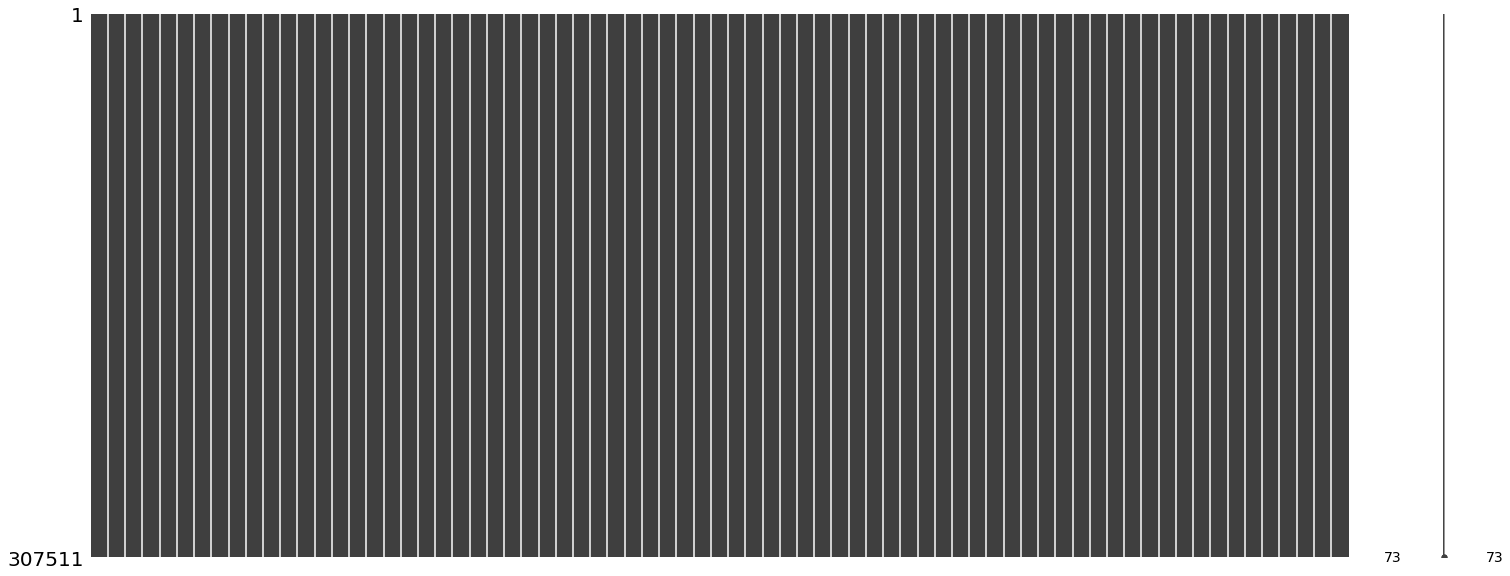

In [24]:
mno.matrix(credit)
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
def encode_features_with_label_encoder(dataframe):
    encoded_dataframe = dataframe.copy()
    
    label_encoder = LabelEncoder()
    
    encoded_dataframe = encoded_dataframe.apply(lambda x: pd.Series(label_encoder.fit_transform(x), name=x.name) if x.dtype == 'object' else x)
    
    return encoded_dataframe

In [27]:
credit = encode_features_with_label_encoder(credit)

In [28]:
credit.shape

(307511, 73)

In [29]:
credit.select_dtypes("O")

""
0
1
2
3
4
...
307506
307507
307508
307509


# Data Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = credit.drop('TARGET', axis=1) # características
y = credit['TARGET'] # variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (215257, 72)
Forma de y_train: (215257,)
Forma de X_test: (92254, 72)
Forma de y_test: (92254,)


In [32]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(0    0.919111
 1    0.080889
 Name: TARGET, dtype: float64,
 0    0.919646
 1    0.080354
 Name: TARGET, dtype: float64)

# Modeling

In [33]:
!pip install xgboost

In [34]:
!pip install lightgbm

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [36]:
models = [
    XGBClassifier(random_state=42),
    LGBMClassifier(random_state=42),
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

XGBClassifier
[[84575   266]
 [ 7237   176]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.40      0.02      0.04      7413

    accuracy                           0.92     92254
   macro avg       0.66      0.51      0.50     92254
weighted avg       0.88      0.92      0.88     92254

LGBMClassifier
[[84725   116]
 [ 7308   105]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.48      0.01      0.03      7413

    accuracy                           0.92     92254
   macro avg       0.70      0.51      0.49     92254
weighted avg       0.88      0.92      0.88     92254



C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
[[84840     1]
 [ 7413     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254

RandomForestClassifier
[[84829    12]
 [ 7396    17]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.59      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.75      0.50      0.48     92254
weighted avg       0.89      0.92      0.88     92254

GradientBoostingClassifier
[[84774    67]
 [ 7331    82]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.55      0.01      0.02      7413

    accuracy        

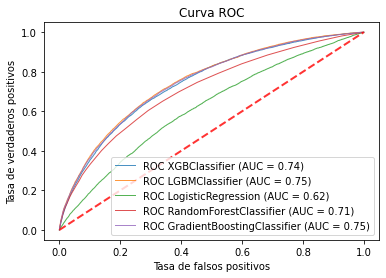

In [37]:
# Entrenar y evaluar los modelos
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC %s (AUC = %0.2f)' % (model.__class__.__name__, roc_auc))

# Graficar la curva ROC para todos los modelos
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Variable Ranking

In [38]:
lgbm = models[1]

In [39]:
# Guardamos el feature importance
feature_importance = lgbm.feature_importances_
feature_name = lgbm.feature_name_

# Crear DataFrame con los resultados de feature importance
ranking_variables_df = pd.DataFrame({'feature': feature_name, 'importance': feature_importance})

# Ordenar el DataFrame en orden descendente de acuerdo con los valores de feature importance
ranking_variables_df = ranking_variables_df.sort_values('importance', ascending=False)

,feature,importance
40,EXT_SOURCE_3,266
39,EXT_SOURCE_2,223
16,DAYS_BIRTH,209
7,AMT_CREDIT,209
8,AMT_ANNUITY,174
19,DAYS_ID_PUBLISH,166
9,AMT_GOODS_PRICE,163
17,DAYS_EMPLOYED,146
45,DAYS_LAST_PHONE_CHANGE,128
0,SK_ID_CURR,116


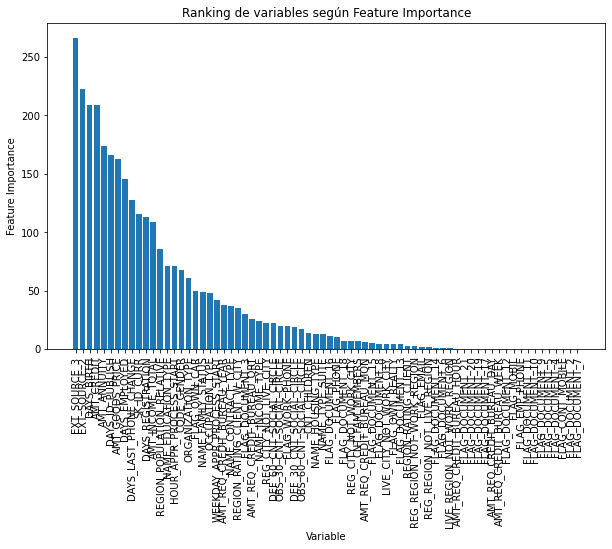

In [40]:
# Visualizar el DataFrame
display(ranking_variables_df)

# Crear un gráfico de barras de mayor a menor feature importance
plt.figure(figsize=(10,6))
plt.bar(ranking_variables_df['feature'], ranking_variables_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Feature Importance')
plt.title('Ranking de variables según Feature Importance')
plt.show()